# Simulating Spectral Sampling of the MICA Files with Enfys

In this notebook we simulate the spectral resolution of Enfys, sample the MICA Files spectral library, remove the continuum, and illustrate this sampling with a spectrogram.

# Overview

1. Load MICA Files High-Resolution library.
2. Build Enfys simulator instrument
3. Sample MICA with Enfys
4. Produce Visualisations

# Setup

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sptk.config as cfg

We set our simulation resolution range to match that of Enfys, 0.9 - 3.1 µm.

In [3]:
cfg.update_sample_res('wvl_min', 850)
cfg.update_sample_res('wvl_max', 3200)

In [4]:
PROJECT_NAME = 'enfys_mica'

# Data

## Spectral Library

We use the MICA Files example spectral library to illustrate the sampling of key minerals identified on Mars.

In [5]:
from sptk.material_sets import MICA_SET

In [6]:
from sptk.material_collection import MaterialCollection

We make our high-resolution 'material collection' as an object that hosts this spectral library, and that provides a set of methods for visualising and handling it.

Note that here we've set the ```allow_out_of_bounds``` flag to ```True```, which means that if a spectral library entry doesn't completely span the spectral range, then we will still include it and plot the subset of the range that it does cover.

In [7]:
matcol = MaterialCollection(
        MICA_SET, # defines the material classes and their mineral group constituents
        'MICA_new_dirtree', # the spectral library directory to use
        PROJECT_NAME, # the name of the project
        load_existing=False, # if True, load an existing Material Collection from the project directory
        balance_classes=False, # if True, ensure equal number of entries in each class
        random_bias_seed=None, # if set to an integer this ensures repeatable class balancing
        allow_out_of_bounds=True, # if False, discard entries of the spectral library that don't span the spectral range
        plot_profiles=False, # if true, plot profiles during construction
        export_df=True) # if true, save the output for later access during construction

Building new enfys_mica MaterialCollection DF

NBPP22.csv (clinopyroxene pyroxenes inosilicates MICA_new_dirtree) loaded
LAPP47B.csv (orthopyroxene pyroxenes inosilicates MICA_new_dirtree) loaded
LAPO05.csv (fayalite olivines nesosilicates MICA_new_dirtree) loaded
LASC02.csv (forsterite olivines nesosilicates MICA_new_dirtree) loaded
GDS27.csv (hematite hematites oxides MICA_new_dirtree) loaded
NCLS04.csv (plagioclase feldspars tectosilicates MICA_new_dirtree) loaded
F1CC08B.csv (alunite hydrous_sulphates sulphates MICA_new_dirtree) loaded
GDS145.csv (bassanite hydrous_sulphates sulphates MICA_new_dirtree) loaded
LASF41A.csv (gypsum hydrous_sulphates sulphates MICA_new_dirtree) loaded
LASF21A.csv (jarosite hydrous_sulphates sulphates MICA_new_dirtree) loaded
F1CC15.csv (kieserite hydrous_sulphates sulphates MICA_new_dirtree) loaded
799F366.csv (magnesium-sulphate hydrous_sulphates sulphates MICA_new_dirtree) loaded
LACL14.csv (chlorite chlorites phyllosilicates MICA_new_dirtree) loaded

In [8]:
matcol.main_df

,Filepath,Category,Sample ID,Species,Subgroup,Group,Library,Sample Description,Date Added,Viewing Geometry,...,3190.0,3191.0,3192.0,3193.0,3194.0,3195.0,3196.0,3197.0,3198.0,3199.0
Data ID,,,,,,,,,,,,,,,,,,,,,
Clinopyroxene NBPP22,../data/spectral_library/MICA_new_dirtree/inos...,iron oxides & \n primary silicates,NBPP22,clinopyroxene,pyroxenes,inosilicates,MICA_new_dirtree,NaN,NaN,NaN,...,0.461869,0.461973,0.462059,0.462122,0.462179,0.462251,0.462326,0.462470,0.462625,0.462720
Orthopyroxene LAPP47B,../data/spectral_library/MICA_new_dirtree/inos...,iron oxides & \n primary silicates,LAPP47B,orthopyroxene,pyroxenes,inosilicates,MICA_new_dirtree,NaN,NaN,NaN,...,0.453680,0.453753,0.453834,0.453857,0.453866,0.453910,0.453961,0.453882,0.453783,0.453722
Fayalite LAPO05,../data/spectral_library/MICA_new_dirtree/neso...,iron oxides & \n primary silicates,LAPO05,fayalite,olivines,nesosilicates,MICA_new_dirtree,NaN,NaN,NaN,...,0.295466,0.295620,0.295785,0.295955,0.296126,0.296236,0.296333,0.296391,0.296442,0.296542
Forsterite LASC02,../data/spectral_library/MICA_new_dirtree/neso...,iron oxides & \n primary silicates,LASC02,forsterite,olivines,nesosilicates,MICA_new_dirtree,NaN,NaN,NaN,...,0.724697,0.724762,0.724838,0.724986,0.725152,0.725196,0.725215,0.725217,0.725216,0.725226
Hematite GDS27,../data/spectral_library/MICA_new_dirtree/oxid...,iron oxides & \n primary silicates,GDS27,hematite,hematites,oxides,MICA_new_dirtree,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plagioclase NCLS04,../data/spectral_library/MICA_new_dirtree/tect...,iron oxides & \n primary silicates,NCLS04,plagioclase,feldspars,tectosilicates,MICA_new_dirtree,NaN,NaN,NaN,...,0.318805,0.318855,0.318948,0.319019,0.319083,0.318862,0.318583,0.318378,0.318185,0.318112
Alunite F1CC08B,../data/spectral_library/MICA_new_dirtree/sulp...,sulfates,F1CC08B,alunite,hydrous_sulphates,sulphates,MICA_new_dirtree,NaN,NaN,NaN,...,0.054865,0.054953,0.055058,0.055244,0.055451,0.055571,0.055673,0.055702,0.055720,0.055833
Bassanite GDS145,../data/spectral_library/MICA_new_dirtree/sulp...,sulfates,GDS145,bassanite,hydrous_sulphates,sulphates,MICA_new_dirtree,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gypsum LASF41A,../data/spectral_library/MICA_new_dirtree/sulp...,sulfates,LASF41A,gypsum,hydrous_sulphates,sulphates,MICA_new_dirtree,NaN,NaN,NaN,...,0.186332,0.187377,0.188455,0.189473,0.190475,0.191501,0.192532,0.193627,0.194732,0.195916


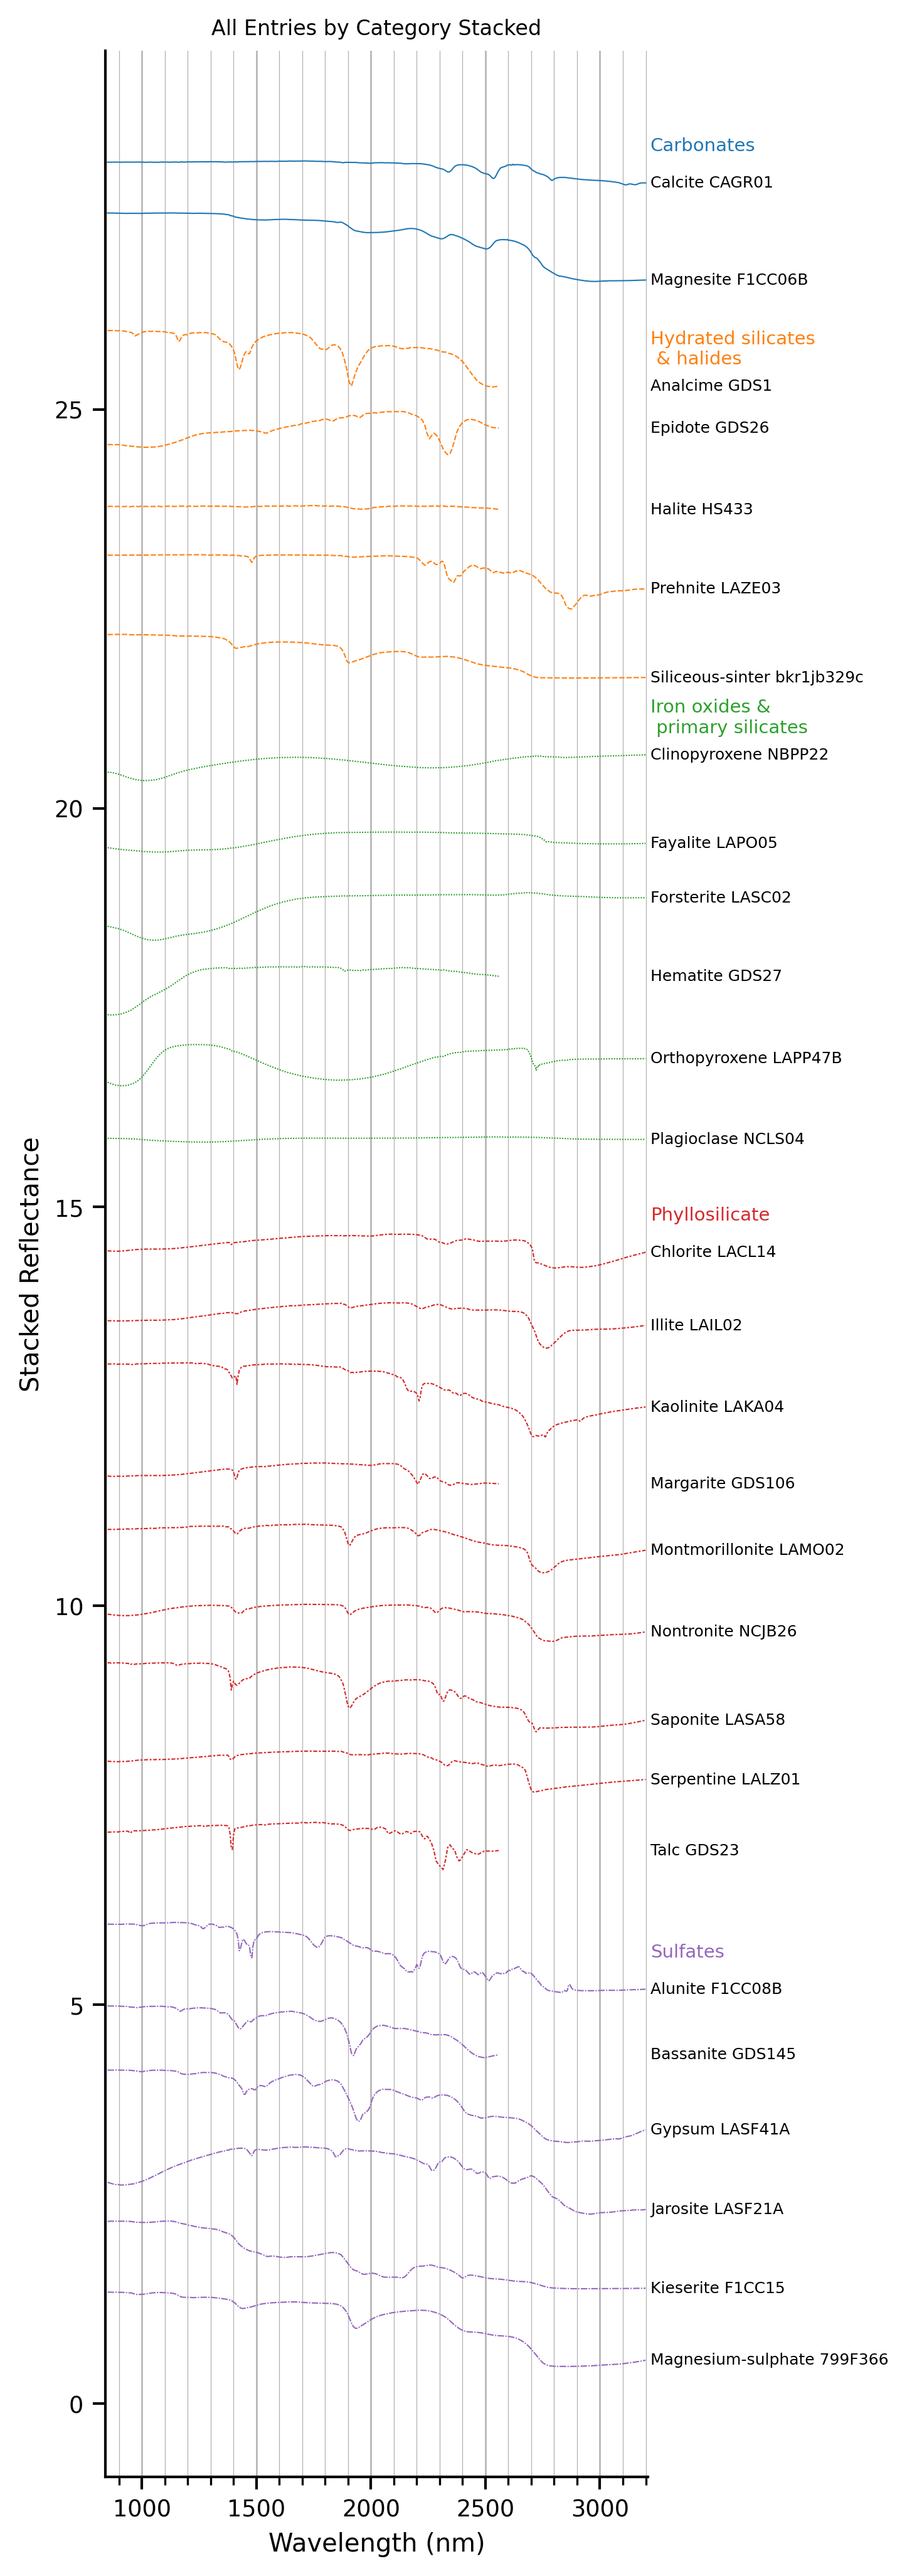

In [83]:
ax = matcol.plot_profiles(scope='all', groupby='Category', stacked=True)

## Instrument

<p align="center">
  <a href="" rel="noopener">
 <img max-width=512px src="enfys_diagram.png" alt="Enfys Diagram"></a>
</p>

To simulate Enfys, rather than providing a file with the expected spectral response of each position of the Linear-Variable Filter (LVF, above), we specify the spectral range and resolution and sampling regime, and generate a set of central-wavelengths and bandwidths. We do this with the ```InstrumentBuilder``` class of the ```sptk.instrument``` module.

In [ ]:
from sptk.instrument import InstrumentBuilder

The expected spectral resolution of Enfys is $\lambda/\Delta\lambda = 100$, and the range is 0.9 - 3.1 µm.

In [ ]:
enfys_builder = InstrumentBuilder(
    instrument_name='enfys',
    instrument_type='lvf',
    sampling='nyquist',
    resolution = 100,
    spectral_range=[900, 3101])

In [ ]:
enfys_builder.main_df

In [ ]:
from sptk.instrument import Instrument

Now we build the transmission profiles for each LVF position, according to the list of CWLs and FWHMs generated above. These are accessed by reading the ```.csv``` file produced by the ```InstrumentBuilder``` procedure.

When generating the profiles, we turn the CWl and FWHM into a profile by assuming a distribution function. For Enfys we use the Cauchy distribution, which beahves similarly to a Gaussian, but with wider 'wings'. It is parameterised by the full-width-at-half-maximum, as the distribution strictly has no finite variance. We have implemented a ```build_cauchy_filter``` method for the ```Instrument``` class.

In [ ]:
enfys = Instrument(
            name = 'enfys', # filename of the instrument information, held in /software/data/instruments/            
            project_name = matcol.project_name, # the project directory name, hosting outputs in the /spectral_parameter_studies/ directory
            shape = 'cauchy',
            load_existing=False, # if True, load existing instrument data from the project directory
            plot_profiles=False, # if true, plot the transmission profiles during construction
            export_df=True) # if True, export the instrument transmission profiles to the project directory

In [ ]:
enfys.plot_filter_profiles()

This crude plot illustrates all of the linear-variable-filter positions considered here, under Nyquist sampling. That, the interval between each CWL is FWHM / 2. This gives 249 channels over 0.9 - 3.1 µm.

# Sampling MICA with Enfys

We now make an ```Observation``` object by sampling the MICA files ```MaterialCollection``` with the Enfys ```Instrument```.

In [ ]:
from sptk.observation import Observation

In [ ]:
obs = Observation(
    material_collection=matcol,
    instrument = enfys,
    load_existing=False,
    plot_profiles=False,
    export_df=True)

We can plot the sampled spectra against the input high-spectra below:

In [ ]:
axes = obs.plot_profiles(stacked=True, hires_under=False, categories_only=True)
import matplotlib.pyplot as plt
plt.show()

To collect the spectra together in an easy to visualise way, we can also produce a 'spectrogram'.

In [ ]:
from sptk.spectral_library_analyser import SpectralLibraryAnalyser as sla

In [ ]:
plottr_mc = sla(matcol)

In [ ]:
cr_df = plottr_mc.remove_continuum()

In [ ]:
fig, ax = plottr_mc.visualise_spectrogram()

Now we look at the Enfys sampled library:

In [ ]:
plotter = sla(obs)

In [ ]:
plotter.remove_continuum()

In [ ]:
fig, ax = plotter.visualise_spectrogram()

By comparing the Material Collection high resolution spectrograph to the Enfys sampled spectrograph, we can get an idea of the resolution of Enfys.